In [178]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import random
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('Project3Preprocessing.arff.csv')
df.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df.drop('Type',axis='columns', inplace=True)

kmeans = KMeans(
        init="random",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state=None,
)


In [179]:
kmeans.fit(df)

#The lowest SSE value
kmeans.inertia_

#Final location of the centroid
kmeans.cluster_centers_

#the number of iterations required to converge
kmeans.n_iter_

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)


9

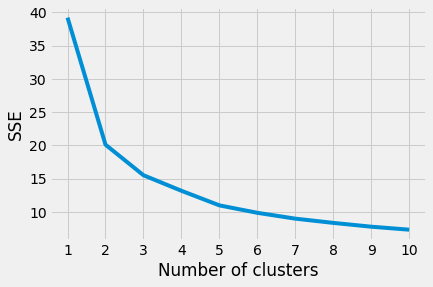

In [127]:
#Elbow aðferð til að finna besta k
kmeans_kwargs = {
        "init": "random",
        "n_init":10,
        "max_iter":300,
        "random_state": None,
        }


SSE = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
    

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), SSE)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [128]:
kl = KneeLocator(
        range(1,11), SSE, curve ="convex", direction="decreasing"
        )
kl.elbow


3

In [182]:
km = KMeans(n_clusters=3)
y_predicted =km.fit_predict(df[['RI','Na']])

In [184]:
df['cluster'] = y_predicted
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,cluster
0,0.297629,0.309774,0.779510,0.258567,0.575000,0.103060,0.310409,0.000000,0.000000,2
1,0.231782,0.215038,0.783964,0.330218,0.550000,0.091787,0.288104,0.000000,0.000000,2
2,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.000000,0.000000,2
3,0.080773,0.551880,0.387528,0.389408,0.846429,0.000000,0.200743,0.000000,0.000000,0
4,0.237050,0.303759,0.634744,0.358255,0.617857,0.091787,0.312268,0.034921,0.431373,2


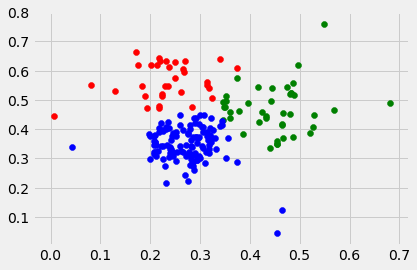

In [188]:
#Prófa kmean cluster fyrir Ri og Na
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.RI,df1['Na'], color= 'red')
plt.scatter(df2.RI,df2['Na'], color= 'green')
plt.scatter(df3.RI,df3['Na'], color= 'blue')
plt.show()

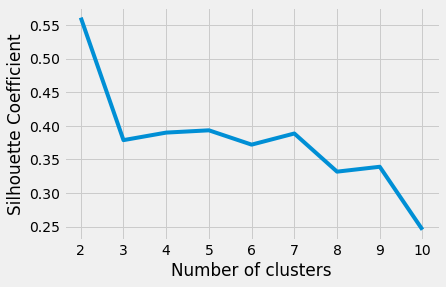

In [102]:
#Silhouette aðferðin
silhouette_coe = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coe.append(score)
        
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coe)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [116]:
df.shape

(198, 9)

In [118]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.297629,0.309774,0.779510,0.258567,0.575000,0.103060,0.310409,0.000000,0.000000
1,0.231782,0.215038,0.783964,0.330218,0.550000,0.091787,0.288104,0.000000,0.000000
2,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.000000,0.000000
3,0.080773,0.551880,0.387528,0.389408,0.846429,0.000000,0.200743,0.000000,0.000000
4,0.237050,0.303759,0.634744,0.358255,0.617857,0.091787,0.312268,0.034921,0.431373


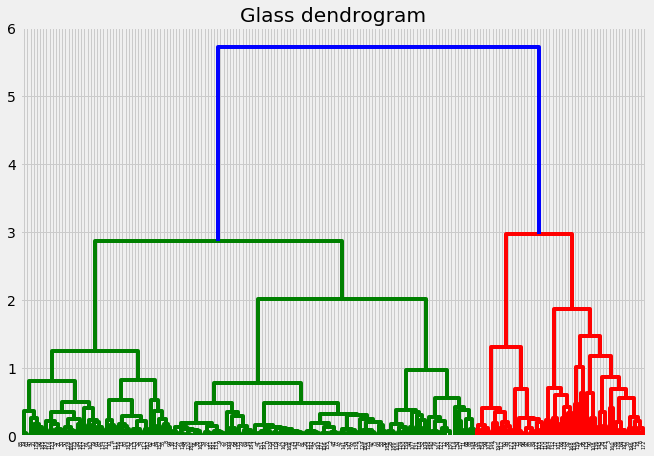

In [144]:
import scipy.cluster.hierarchy as shc
#Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Glass dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [177]:
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [ ]:
#til að plotta clusterinn þá þurfum við 2 attributes úr þessum db